In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read from txt & store in dataframe.

In [8]:
import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/train.txt',sep='\s+',header=None)
df = pd.DataFrame(df)

Plotting training samples.

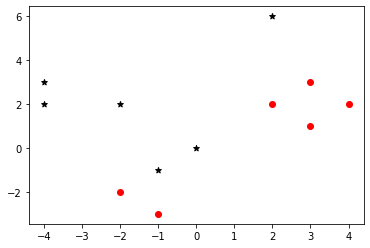

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = df[0]
y = df[1]
L = df[2]

plt.scatter(x[L==1], y[L==1], marker='o', c='red',label='Train Class 1')
plt.scatter(x[L==2], y[L==2], marker='*', c='black',label='Train Class 2')

Calculating mean for each class

In [10]:
import pandas as pd

meanx1 =  np.average(df[0], weights=(df[2] == 1))
meany1 =  np.average(df[1], weights=(df[2] == 1))
meanx2 =  np.average(df[0], weights=(df[2] == 2))
meany2 =  np.average(df[1], weights=(df[2] == 2))

print(df)
print(meanx1)
print(meany1)
print(meanx2)
print(meany2)

    0  1  2
0   2  2  1
1   3  1  1
2  -4  3  2
3   3  3  1
4  -1 -3  1
5   2  6  2
6   4  2  1
7  -2 -2  1
8   0  0  2
9  -2  2  2
10 -1 -1  2
11 -4  2  2
1.5
0.5
-1.5
2.0


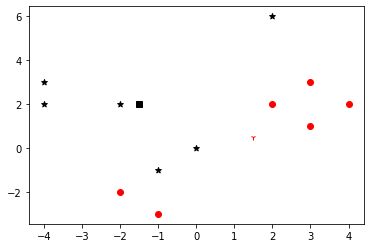

In [11]:
plt.plot(meanx1,meany1, marker='1', c='red',label='Mean Class 1')

plt.plot(meanx2,meany2, marker='s', c='black',label='Mean Class 2')

plt.scatter(x[L==1], y[L==1], marker='o', c='red',label='Train Class 1')
plt.scatter(x[L==2], y[L==2], marker='*', c='black',label='Train Class 2')


Read from test.txt

In [12]:
df2=pd.read_csv('/content/drive/MyDrive/test.txt',sep='\s+',header=None)
df2 = pd.DataFrame(df2)

Creating np array to store only co-ordinates of test data.

In [13]:
npa1=df.to_numpy()
npa2=df2.to_numpy()

In [25]:
Nnpa1 = []
for i, row in enumerate(npa1):            
    N_row = []                          
    for j, element in enumerate(row):  
        if j!=2:
            N_row.append(element)        
    Nnpa1.append(N_row)                     

# print(Nnpa2)
Nnpa1=np.array(Nnpa1)

In [26]:
Nnpa2 = []
for i, row in enumerate(npa2):            
    N_row = []                          
    for j, element in enumerate(row):  
        if j!=2:
            N_row.append(element)        
    Nnpa2.append(N_row)                     

Nnpa2=np.array(Nnpa2)

In [27]:
print(Nnpa2)

[[-1 -5]
 [ 3  2]
 [-2  1]
 [ 8  2]
 [ 6 -1]
 [ 0  2]
 [-3  0]]


In [28]:
m1=np.zeros
m2=np.zeros

In [29]:
me1=[]
me2=[]
me1.extend([meanx1,meany1])
me2.extend([meanx2,meany2])

In [30]:
m1=np.array(me1)
m2=np.array(me2)

In [31]:
m1=m1.reshape(1,2)
m2=m2.reshape(1,2)

In [32]:
m1.shape

(1, 2)

In [33]:
npa2.shape

(7, 3)

In [34]:
Nnpa2.shape

(7, 2)

Calculating g1 and g2 for the classification of test data.

true for 1
true for 1
true for 2
true for 1
true for 1
false for 2
true for 2


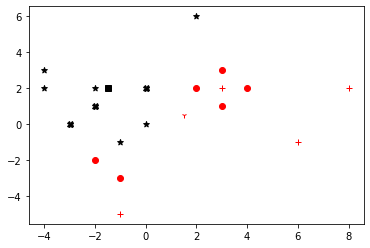

In [35]:
tru=0
for i in range(len(npa2)):
  g1=np.matmul(Nnpa2[i],np.transpose(m1))-.5*(np.matmul(m1,np.transpose(m1))) 
  g2=np.matmul(Nnpa2[i],np.transpose(m2))-.5*(np.matmul(m2,np.transpose(m2))) 
  if g1>g2:
    plt.plot(Nnpa2[i][0],Nnpa2[i][1],marker='+', c='red',label='Test Class 1')
    if npa2[i][2]==1:
      print("true for 1")
      tru+=1
    else:
      print("false for 1")
  else:
    plt.plot(Nnpa2[i][0],Nnpa2[i][1],marker='X', c='black',label='Test Class 2')
    if npa2[i][2]==2:
      print("true for 2")
      tru+=1
    else:
      print("false for 2")

plt.plot(meanx1,meany1, marker='1', c='red',label='Mean Class 1')

plt.plot(meanx2,meany2, marker='s', c='black',label='Mean Class 2')

plt.scatter(x[L==1], y[L==1], marker='o', c='red',label='Train Class 1')
plt.scatter(x[L==2], y[L==2], marker='*', c='black',label='Train Class 2')

# plt.legend()

In [36]:
lb1=np.amin(Nnpa1,axis=0)
ub1=np.amax(Nnpa1,axis=0)
print(lb1,ub1)
lb2=np.amin(Nnpa2,axis=0)
ub2=np.amax(Nnpa2,axis=0)
print(lb2,ub2)

[-4 -3] [4 6]
[-3 -5] [8 2]


In [37]:
LB=np.minimum(lb1,lb2)
UB=np.maximum(ub1,ub2)
print(LB,UB)

[-4 -5] [8 6]


In [38]:
dbx1=[]
for i in range(-4,9,1):
  dbx1.append(i)
dbx1

[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

Calculating coefficients for decision boundary.

In [39]:
coef=m1-m2
coef

array([[ 3. , -1.5]])

In [40]:
coef[0][1]

-1.5

In [41]:
dbx1=np.array(dbx1)
coef=np.array(coef)

In [42]:
coef.reshape(1,2)

array([[ 3. , -1.5]])

Calculating constant for decision boundary.

In [43]:
const=-0.5*np.linalg.det(np.dot(np.transpose(m1),m1)-np.dot(np.transpose(m2),m2))

In [44]:
const

7.031250000000001

In [45]:
dbx1.shape

(13,)

In [46]:
dbx1=dbx1.reshape(1,13)

In [47]:
dbx2=[]
dbx2=np.array(dbx2)
dbx2=np.zeros(13)
dbx2=dbx2.reshape(1,13)

Calculating y axis values for the DB.

In [48]:
for i in range(len(dbx1)):
  dbx2[i] = (coef[0][0]*dbx1[i]+const)/(-coef[0][1])

In [49]:
dbx1.shape

(1, 13)

In [50]:
dbx2.shape

(1, 13)

In [51]:
dbx1=np.transpose(dbx1)
dbx2=np.transpose(dbx2)

Plotting all the points along with decision boundary and legends.

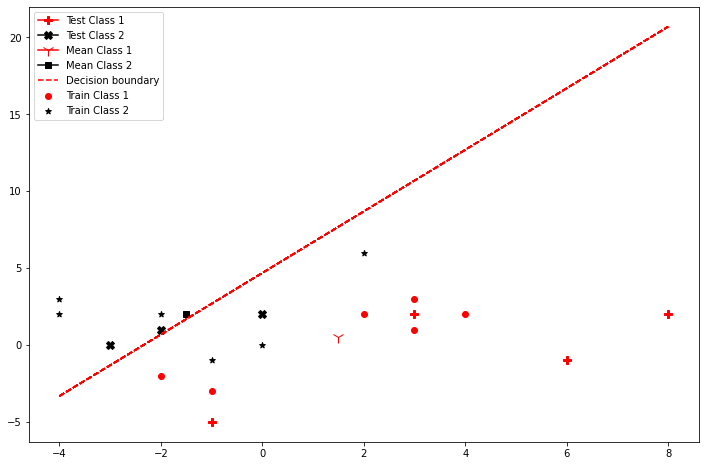

In [52]:
my_labels = { 
             "x2" : "Test Class 1", "x3" : "Test Class 2",
             "x4" : "Mean Class 1", "x5" : "Mean Class 2",
             "x6" : "Train Class 1", "x7" : "Train Class 2",
             "x1" : "Decision boundary"}
fig = plt.figure(figsize=(12,8))
  
for i in range(len(npa2)):
  g1=np.matmul(Nnpa2[i],np.transpose(m1))-.5*(np.matmul(m1,np.transpose(m1))) 
  g2=np.matmul(Nnpa2[i],np.transpose(m2))-.5*(np.matmul(m2,np.transpose(m2))) 
  if g1>g2:
    plt.plot(Nnpa2[i][0],Nnpa2[i][1],marker='P', c='red',label=my_labels["x2"], ms=8)
    my_labels["x2"] = "_nolegend_"
  else:
    plt.plot(Nnpa2[i][0],Nnpa2[i][1],marker='X', c='black',label=my_labels["x3"],ms=8)
    my_labels["x3"] = "_nolegend_"

plt.plot(meanx1,meany1, marker='1', c='red',label=my_labels["x4"],ms=12)
my_labels["x4"] = "_nolegend_"

plt.plot(meanx2,meany2, marker='s', c='black',label=my_labels["x5"])
my_labels["x5"] = "_nolegend_"

plt.scatter(x[L==1], y[L==1], marker='o', c='red',label=my_labels["x6"])
my_labels["x6"] = "_nolegend_"
plt.scatter(x[L==2], y[L==2], marker='*', c='black',label=my_labels["x7"])
my_labels["x7"] = "_nolegend_"

# Plotting the decision boundary.
for i in range(len(dbx1)):
  plt.plot(dbx1,dbx2,c='red',linestyle='dashed',label=my_labels["x1"])
  my_labels["x1"] = "_nolegend_"

plt.legend()
  

plt.show() 

Accuraccy of the classifier

In [53]:
accuracy=tru/len(npa2)
print(accuracy*100,"%")

85.71428571428571 %
